Modules

In [560]:
import pandas as pd
import seaborn as sns
import requests
import time 
import bs4 
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt
%matplotlib inline

Question One: Suicide Rate Analysis

Importing the data
,Reading the data
,Cleaning the data

In [315]:
suicides_df = pd.read_csv("WHO_Suicide_Data.csv")

In [316]:
suicides_df.head(1000)

,country,year,sex,age,suicides_no,population,gdp_for_year ($)
0,Albania,1987,male,15-24 years,21,312900,"2,156,624,900"
1,Albania,1987,male,35-54 years,16,308000,"2,156,624,900"
2,Albania,1987,female,15-24 years,14,289700,"2,156,624,900"
3,Albania,1987,male,75+ years,1,21800,"2,156,624,900"
4,Albania,1987,male,25-34 years,9,274300,"2,156,624,900"
...,...,...,...,...,...,...,...
995,Armenia,1992,male,5-14 years,NaN,375300,"1,272,577,456"
996,Armenia,1993,female,75+ years,6,53100,"1,201,313,201"
997,Armenia,1993,male,55-74 years,2,226400,"1,201,313,201"
998,Armenia,1993,male,75+ years,2,28400,"1,201,313,201"


Check datatypes

In [359]:
suicides_df.dtypes

country                 object
year                     int64
sex                     object
age(years)              object
suicides_no              int64
population               int64
 gdp_for_year ($)       object
suicides_100k          float64
generation              object
gdp_for_year(usd)        int64
gdp_per_capita(usd)    float64
dtype: object

Change Nulls to 0 with .fillna

In [318]:
suicides_df.fillna(0, inplace=True)


Change Nulls, ' ' and 'Unknown' to 0 using .replace

In [319]:
suicides_df.replace(['Null','','Unknown'], 0, inplace= True)

Change age column name to age(years) 

In [320]:
suicides_df = suicides_df.rename(columns={"age": "age(years)"})

Remove years from the age groups

In [321]:
suicides_df['age(years)'] = suicides_df['age(years)'].str.replace(' years', '')

In [322]:
suicides_df.head(10)

,country,year,sex,age(years),suicides_no,population,gdp_for_year ($)
0,Albania,1987,male,15-24,21,312900,"2,156,624,900"
1,Albania,1987,male,35-54,16,308000,"2,156,624,900"
2,Albania,1987,female,15-24,14,289700,"2,156,624,900"
3,Albania,1987,male,75+,1,21800,"2,156,624,900"
4,Albania,1987,male,25-34,9,274300,"2,156,624,900"
5,Albania,1987,female,75+,1,35600,"2,156,624,900"
6,Albania,1987,female,35-54,6,278800,"2,156,624,900"
7,Albania,1987,female,25-34,4,257200,"2,156,624,900"
8,Albania,1987,male,55-74,1,137500,"2,156,624,900"
9,Albania,1987,female,5-14,0,311000,"2,156,624,900"


In [323]:
suicides_df.sample(10)

,country,year,sex,age(years),suicides_no,population,gdp_for_year ($)
17854,Nicaragua,2014,male,5-14,3,629806,"11,880,438,824"
23370,South Africa,2002,male,5-14,5,5141866,"115,748,110,113"
24658,Sweden,2011,male,35-54,263,1277205,"563,109,663,291"
8842,Finland,1995,female,75+,2,206800,"134,199,346,405"
13170,Jamaica,1985,male,5-14,0,291000,"2,100,223,150"
27658,Uzbekistan,1998,female,75+,12,204400,"14,988,971,211"
8303,El Salvador,2010,female,5-14,7,658707,"18,447,922,400"
11411,Hungary,1994,female,5-14,1,639352,"43,160,392,124"
266,Antigua and Barbuda,1985,female,35-54,0,6173,"240,923,926"
176,Albania,2003,female,35-54,13,381760,"5,746,945,913"


Add  a  new column  “suicides/100k”  and  generate  its  data  suicides/100k population  of  a  country  is  the  population  of  a  specific  age  group  and  gender within that country divided by 100000, and the number of suicides divided by that number.

Temporary dataframe to store first aggregation 

In [324]:
new_df = pd.DataFrame()

In [325]:
new_df['suicides/100K'] = suicides_df['population']/100000

Final aggregation in the main dataframe. Needed to change the datatype of the suicides_no to numeric as it didnt work when trying to divide a str by a float. This changes all values to a numberic type

In [326]:
suicides_df['suicides_100k'] = pd.to_numeric(suicides_df['suicides_no']) / new_df['suicides/100K']

In [327]:
suicides_df.sample(10)

,country,year,sex,age(years),suicides_no,population,gdp_for_year ($),suicides_100k
25206,Thailand,2008,male,25-34,757,5411804,"291,383,081,232",13.987942
19745,Puerto Rico,1990,female,55-74,1,231000,"30,603,919,000",0.432900
13244,Jamaica,2000,male,35-54,2,271965,"8,985,352,832",0.735389
12493,Israel,1991,male,15-24,49,443300,"67,530,220,219",11.053463
10751,Guatemala,1989,female,75+,0,47591,"8,410,724,361",0.000000
22021,Serbia,2002,female,55-74,169,910921,"16,116,843,146",18.552652
23496,South Africa,2013,male,75+,5,278931,"366,829,390,479",1.792558
11806,Iceland,1996,male,25-34,9,20500,"7,330,965,239",43.902439
22446,Singapore,1988,female,5-14,4,193900,"25,337,226,971",2.062919
10196,Greece,1999,female,55-74,28,1238252,"142,540,728,958",2.261252


In [403]:
t = suicides_df['year'].unique()
t.argsort()

array([22, 23,  0,  1,  2, 24, 25,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,
       13, 14, 15, 16, 17, 18, 19, 20, 21, 30, 26, 27, 28, 29, 31],
      dtype=int64)

Add a new column “generation” and fill up its data according to below criteria 

Using the temporary dataframe to store the age column so I can remove the 75+ as it will cause problems in the next step and Year in order to do the subtraction

In [329]:
new_df['age(years)'] = suicides_df['age(years)'].replace('75+', '75-100')

In [330]:
new_df['year'] = suicides_df['year']

The first thing to do is to change the age(years) groups to intervals/range so it will look like this (15,24) and can be stored as a integer data type, instead of (15-24) which is a string. This works by removing the '-' and making the values at index 0 and index 1 integers. This will give us our lower and upper bounds of age groups. Lamda is like a temporary function that we can recall without defining intiately . 

In [331]:
new_df['age_bounds'] = new_df['age(years)'].str.split('-').apply(lambda x: (int(x[0]), int(x[1])))

As you know within an age group there could be more than 1 generation, I address this by dividing the sum of the lower and upper bounds by 2 in  order to get the average and I use the averahe to establish a singular year_of_birth.

In [332]:
new_df['year_of_birth'] = new_df['year'] - new_df['age_bounds'].apply(lambda x: int(sum(x)/2))

Create a function that takes the argument that is the dataframe temporarily created and then compute some basic if and elif else statement that iterates throught the possible years of birth and assigns a generation based on said year. The if statement isnt optimised and take 0.5 seconds to when optimised it took 0.1 seconds but gave me a wrong output for come reason. So i settles for this.  After it applies the functions output to a newly created dataframe named 'generation' within the temporary dataframe. 

In [333]:
def identify_generation(new_df):
    if new_df['year_of_birth'] >= 1883 and new_df['year_of_birth'] <= 1900:
        return 'Lost Generation'
    elif new_df['year_of_birth'] >= 1901 and new_df['year_of_birth'] <= 1927:
        return 'G.I. Generation'
    elif new_df['year_of_birth'] >= 1928 and new_df['year_of_birth'] <= 1945:
        return 'Silent Generation'
    elif new_df['year_of_birth'] >= 1946 and new_df['year_of_birth'] <= 1964:
        return 'Boomers'
    elif new_df['year_of_birth'] >= 1965 and new_df['year_of_birth'] <= 1980:
        return 'Generation X'
    elif new_df['year_of_birth'] >= 1981 and new_df['year_of_birth'] <= 1996:
        return 'Millennials'
    elif new_df['year_of_birth'] >= 1997 and new_df['year_of_birth'] <= 2012:
        return 'Generation Z'
    elif new_df['year_of_birth'] >= 2013 and new_df['year_of_birth'] <= 2025:
        return 'Generation A'
    else:
        return 'Unknown Generation'
    
new_df['generation'] = new_df.apply(identify_generation, axis=1)


In [334]:
new_df.sample(10)

,suicides/100K,age(years),year,age_bounds,year_of_birth,generation
24378,5.18700,5-14,1987,"(5, 14)",1978,Generation X
22551,4.85900,35-54,1997,"(35, 54)",1953,Boomers
15421,0.15300,75-100,1994,"(75, 100)",1907,G.I. Generation
22128,5.01889,25-34,2011,"(25, 34)",1982,Millennials
15854,0.08100,75-100,1988,"(75, 100)",1901,G.I. Generation
8149,6.88541,5-14,1997,"(5, 14)",1988,Millennials
11384,6.39938,25-34,1992,"(25, 34)",1963,Boomers
3126,0.21022,55-74,2008,"(55, 74)",1944,Silent Generation
21817,0.10320,15-24,2006,"(15, 24)",1987,Millennials
23695,21.45800,5-14,1998,"(5, 14)",1989,Millennials


In [355]:
new_df.dtypes

suicides/100K        float64
age(years)            object
year                   int64
age_bounds            object
year_of_birth          int64
generation            object
gdp_for_year(usd)      int64
suicides_no            int64
country               object
rank                 float64
dtype: object

Doing things this way allows me to maintain the logical order of age groups, 15-24 reads better than (15,24). The temp dataframe is like a data lake I can pull clean data from plus If i alter the main suicide_df I could run into issues if I make a mistake. 

Adding generation to the main suicide_dataframe.

In [336]:
suicides_df['generation'] = new_df['generation']

In [337]:
suicides_df.sample(10)

,country,year,sex,age(years),suicides_no,population,gdp_for_year ($),suicides_100k,generation
27810,Uzbekistan,2014,female,15-24,347,2992817,"63,067,077,179",11.594428,Millennials
1291,Aruba,2000,male,15-24,0,5514,"1,873,452,514",0.000000,Millennials
20376,Republic of Korea,1997,female,75+,173,647600,"557,503,074,772",26.714021,G.I. Generation
20498,Republic of Korea,2007,female,55-74,984,4009684,"1,122,679,154,632",24.540587,Silent Generation
6310,Costa Rica,2010,male,55-74,36,274921,"37,268,635,287",13.094671,Boomers
23700,Spain,1999,female,75+,171,1752702,"633,194,118,900",9.756365,G.I. Generation
18177,Norway,2011,female,75+,6,214592,"498,831,558,926",2.796004,G.I. Generation
5726,Colombia,1992,female,25-34,53,2997700,"49,279,585,355",1.768022,Boomers
27701,Uzbekistan,2002,male,25-34,288,1927000,"9,687,951,055",14.945511,Generation X
26784,United Kingdom,2010,female,75+,89,2944062,"2,441,173,394,730",3.023034,G.I. Generation


Add a new  column  “gdp_per_capita” and  fill  its  data.  GDP  per  Capita  of a country is GDP divided by population of that country.

First remove commas from the datatype, change gdp_for_year ($) to an numeric datatype

In [338]:
suicides_df['gdp_for_year(usd)']  = suicides_df[' gdp_for_year ($) '].str.replace(',','')

In [339]:
new_df['gdp_for_year(usd)'] = pd.to_numeric(suicides_df['gdp_for_year(usd)'])

In [340]:
suicides_df['gdp_for_year(usd)'] = new_df['gdp_for_year(usd)']

Aggregation for GDP per capita 

In [722]:
suicides_df['gdp_per_capita(usd)'] = suicides_df['gdp_for_year(usd)'] / suicides_df['population']
suicides_df

,country,year,sex,age(years),suicides_no,population,gdp_for_year ($),suicides_100k,generation,gdp_for_year(usd),gdp_per_capita(usd)
0,Albania,1987,male,15-24,21,312900,"2,156,624,900",6.711409,Generation X,2156624900,6892.377437
1,Albania,1987,male,35-54,16,308000,"2,156,624,900",5.194805,Silent Generation,2156624900,7002.028896
2,Albania,1987,female,15-24,14,289700,"2,156,624,900",4.832585,Generation X,2156624900,7444.338626
3,Albania,1987,male,75+,1,21800,"2,156,624,900",4.587156,Lost Generation,2156624900,98927.747706
4,Albania,1987,male,25-34,9,274300,"2,156,624,900",3.281079,Boomers,2156624900,7862.285454
...,...,...,...,...,...,...,...,...,...,...,...
27835,Belgium,2011,female,25-34,6,707535,"527,008,453,887",0.848015,Millennials,527008453887,744851.426271
27836,Thailand,2016,male,75+,152,1124052,"411,755,164,833",13.522506,Silent Generation,411755164833,366313.270946
27837,Netherlands,1998,female,15-24,21,934500,"432,476,116,419",2.247191,Generation X,432476116419,462788.781615
27838,Grenada,2002,female,5-14,0,11760,"540,336,926",0.000000,Millennials,540336926,45947.017517


Rank countries by total suicides

In [356]:
suicides_df['suicides_no'] = pd.to_numeric(suicides_df['suicides_no'])

In [369]:
rank = suicides_df.groupby(['country'])['suicides_no'].sum()

In [721]:
rank_df = pd.DataFrame(rank).sort_values(by='suicides_no', ascending=False)
rank_df

,suicides_no
country,
Russian Federation,815965
United States,759837
Japan,635785
France,240432
Ukraine,238061
...,...
Maldives,20
Antigua and Barbuda,11
San Marino,4


Find the correlations between suicides, GDP per capita and population. What are your conclusions?

corr() method 

In [374]:
corr_matrix = suicides_df[['suicides_no', 'gdp_per_capita(usd)', 'population']].corr()
print(corr_matrix)

                     suicides_no  gdp_per_capita(usd)  population
suicides_no             1.000000            -0.013125    0.546152
gdp_per_capita(usd)    -0.013125             1.000000   -0.032066
population              0.546152            -0.032066    1.000000


<Axes: >

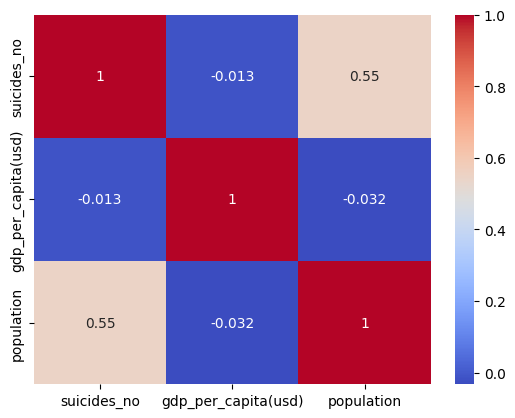

In [377]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

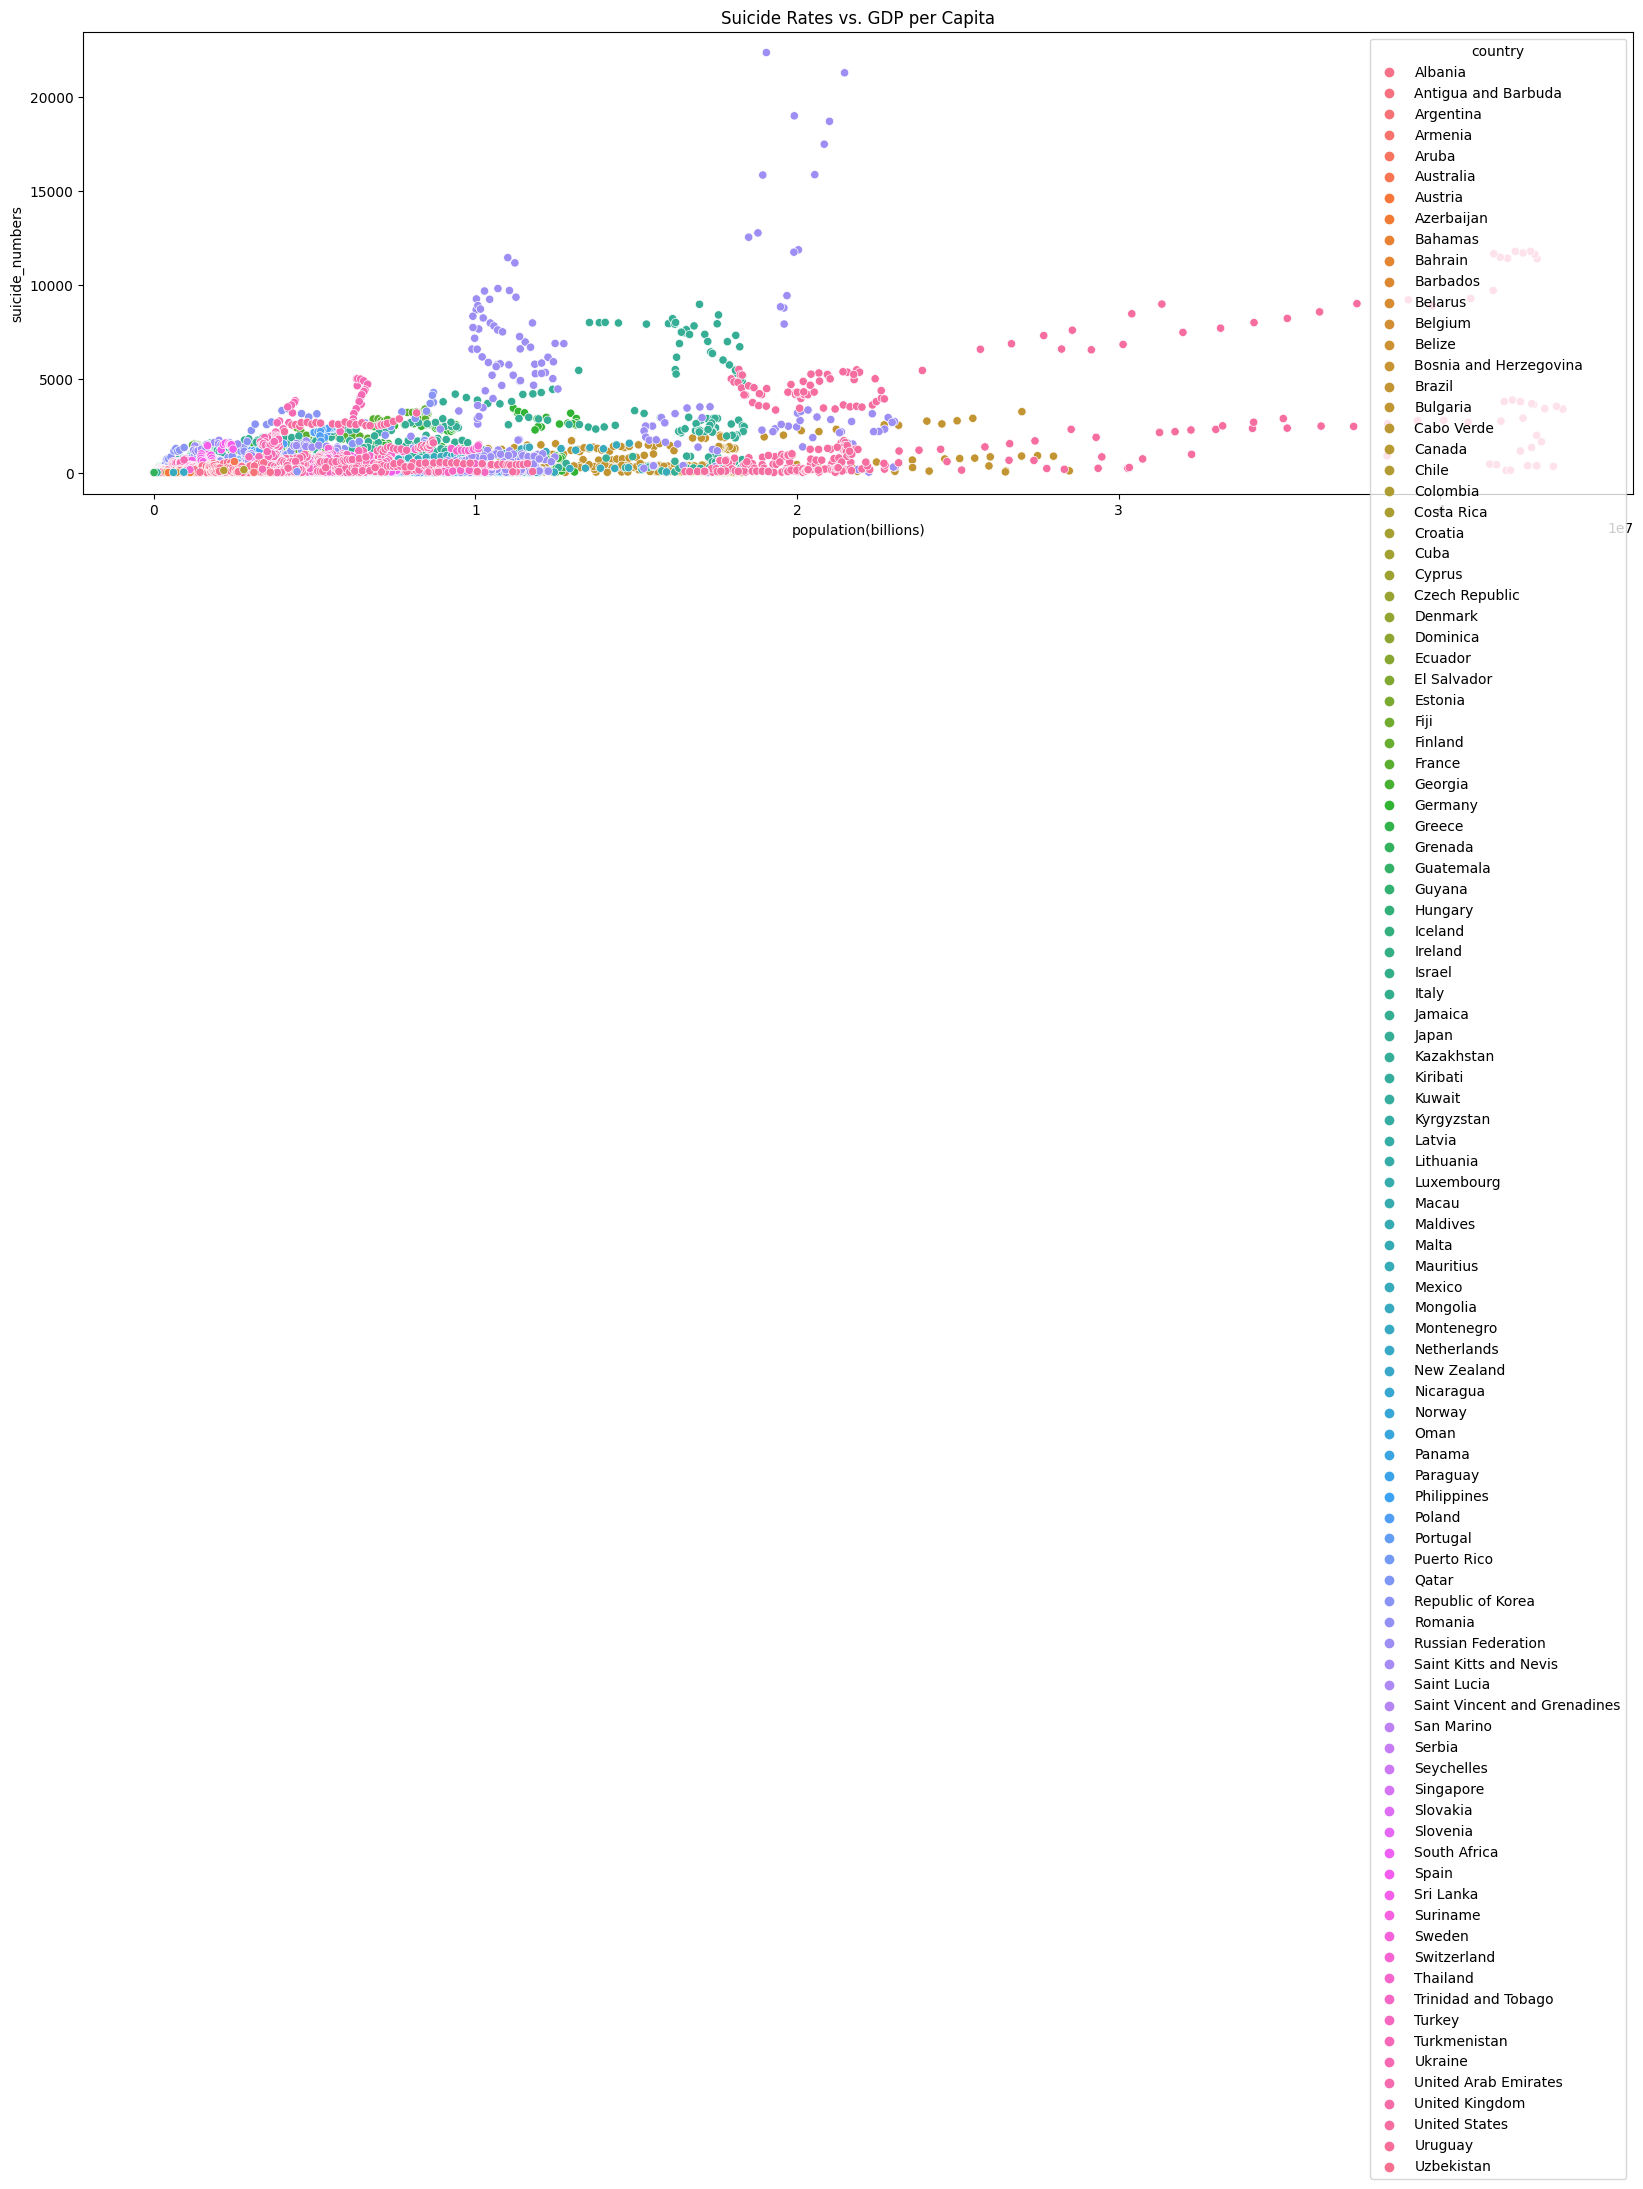

In [513]:
# plot 1
fig, ax = plt.subplots(figsize=(20,6))
# Create the scatter plot
sns.scatterplot(data= suicides_df,x=suicides_df['population'], y=suicides_df['suicides_no'], hue=suicides_df['country'])
plt.ylabel('suicide_numbers')
plt.xlabel('population'+"(billions)")
# Add a title
plt.title('Suicide Rates vs. GDP per Capita')
plt.show()

Use appropriate visual notation to visualise total suicides over years. Describe your findings

In [495]:
total_suicides_df = pd.DataFrame(suicides_df.groupby(['year'])['suicides_no'].sum()).reset_index()

In [496]:
total_suicides_df

,year,suicides_no
0,1985,89009
1,1986,87541
2,1987,101102
3,1988,94701
4,1989,120481
5,1990,131333
6,1991,159158
7,1992,160538
8,1993,166539
9,1994,199798


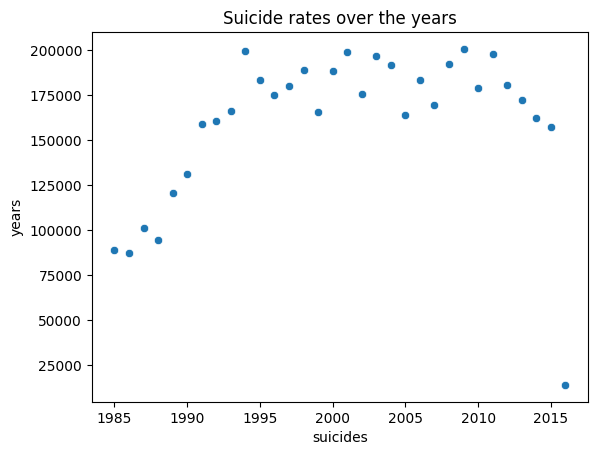

In [724]:
# plot 1
ax = plt.subplots()
# Create the scatter plot
sns.scatterplot(data=total_suicides_df ,x=total_suicides_df['year'], y=total_suicides_df['suicides_no'])
plt.ylabel('years')
plt.xlabel('suicides')
# Add a title
plt.title('Suicide rates over the years')
plt.show()

Compare suicides by gender over years and state your conclusions

In [498]:
gender_suicides_df = pd.DataFrame(suicides_df.groupby(['year', 'sex'])['suicides_no'].sum()).reset_index()

In [499]:
gender_suicides_df

,year,sex,suicides_no
0,1985,female,27115
1,1985,male,61894
2,1986,female,27606
3,1986,male,59935
4,1987,female,28454
...,...,...,...
59,2014,male,121478
60,2015,female,31012
61,2015,male,126305
62,2016,female,3009


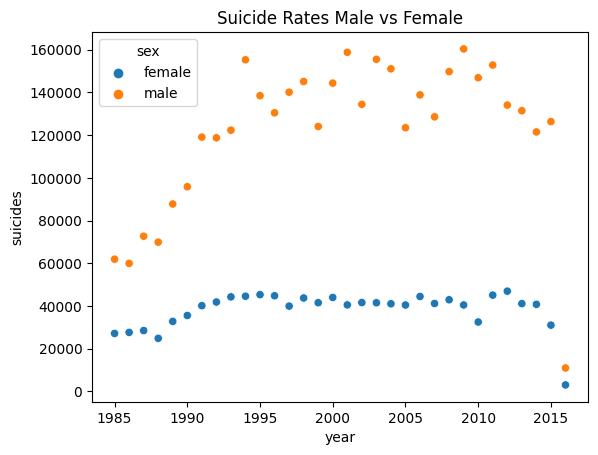

In [723]:
# plot 1
# Create the scatter plot
sns.scatterplot(data=gender_suicides_df ,x=gender_suicides_df['year'], y=gender_suicides_df['suicides_no'], hue=gender_suicides_df['sex'])
plt.xlabel('year')
plt.ylabel('suicides')
# Add a title
plt.title('Suicide Rates Male vs Female')
plt.show()

Calculate  and  Visualise  suicides  on  generation  and  on  age  group.  Describe your findings

In [515]:
gen_suicides_df = pd.DataFrame(suicides_df.groupby(['generation', 'age(years)'])['suicides_no'].sum()).reset_index()

In [516]:
gen_suicides_df

,generation,age(years),suicides_no
0,Boomers,25-34,214491
1,Boomers,35-54,1175041
2,Boomers,55-74,273785
3,G.I. Generation,55-74,181305
4,G.I. Generation,75+,486294
5,Generation X,15-24,277445
6,Generation X,25-34,504898
7,Generation X,35-54,457255
8,Generation X,5-14,4447
9,Generation Z,15-24,1051


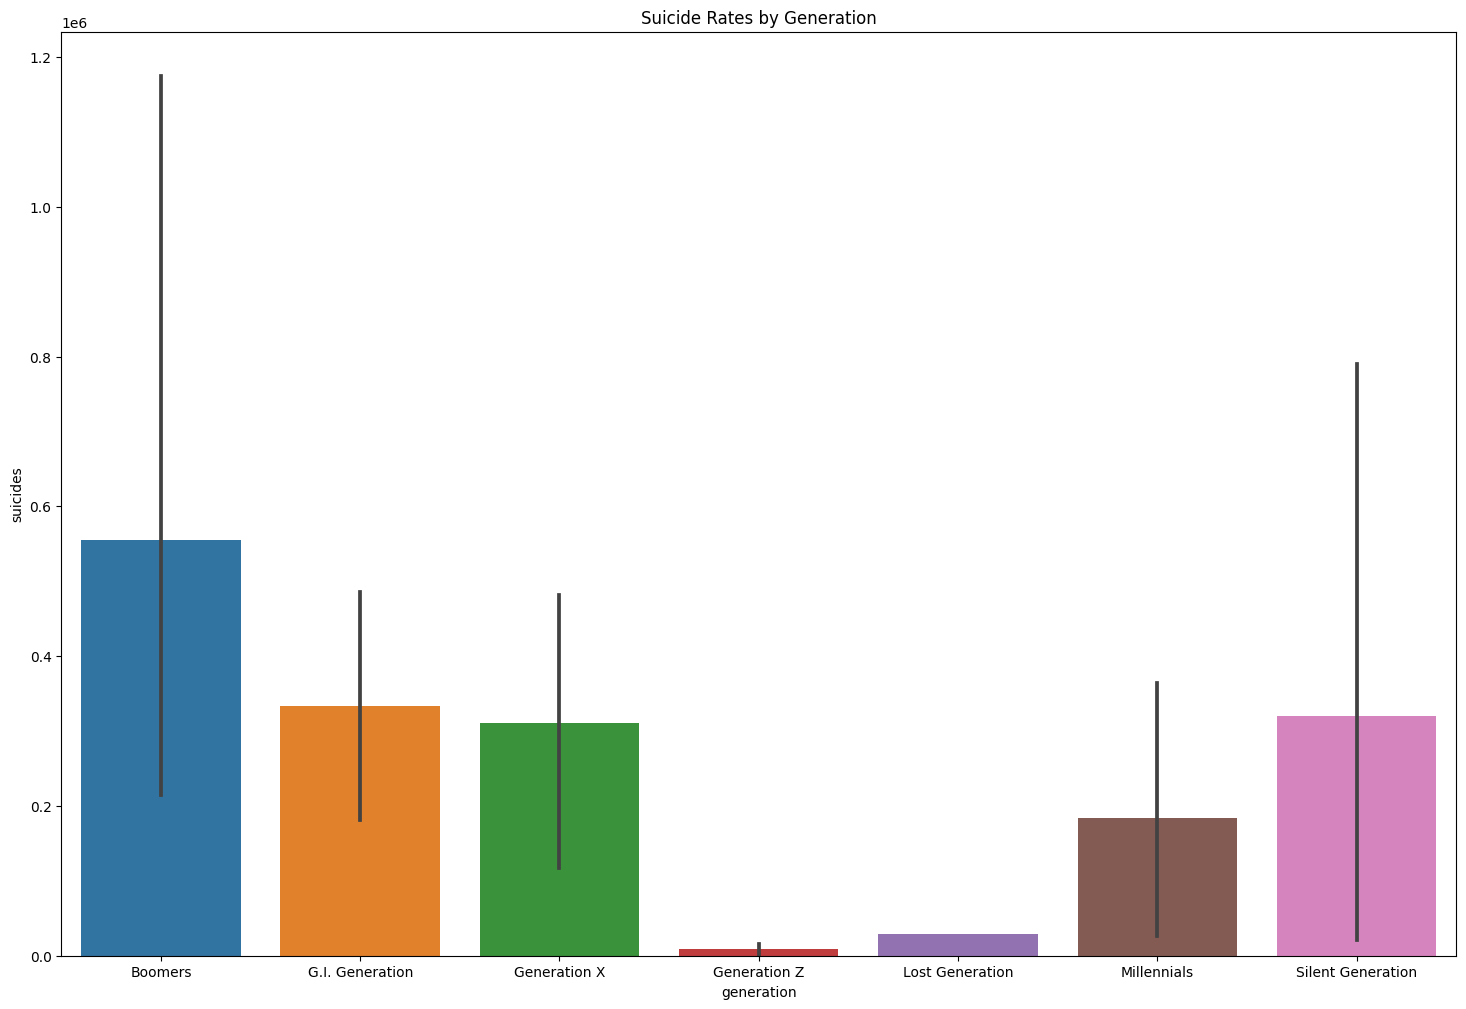

In [729]:
# plot 1
fig, ax = plt.subplots(figsize=(18,12))
# Create the scatter plot
sns.barplot(data=gen_suicides_df,   x=gen_suicides_df['generation'] ,y=gen_suicides_df['suicides_no'])
plt.xlabel('generation')
plt.ylabel('suicides')
# Add a title
plt.title('Suicide Rates by Generation')
plt.show()

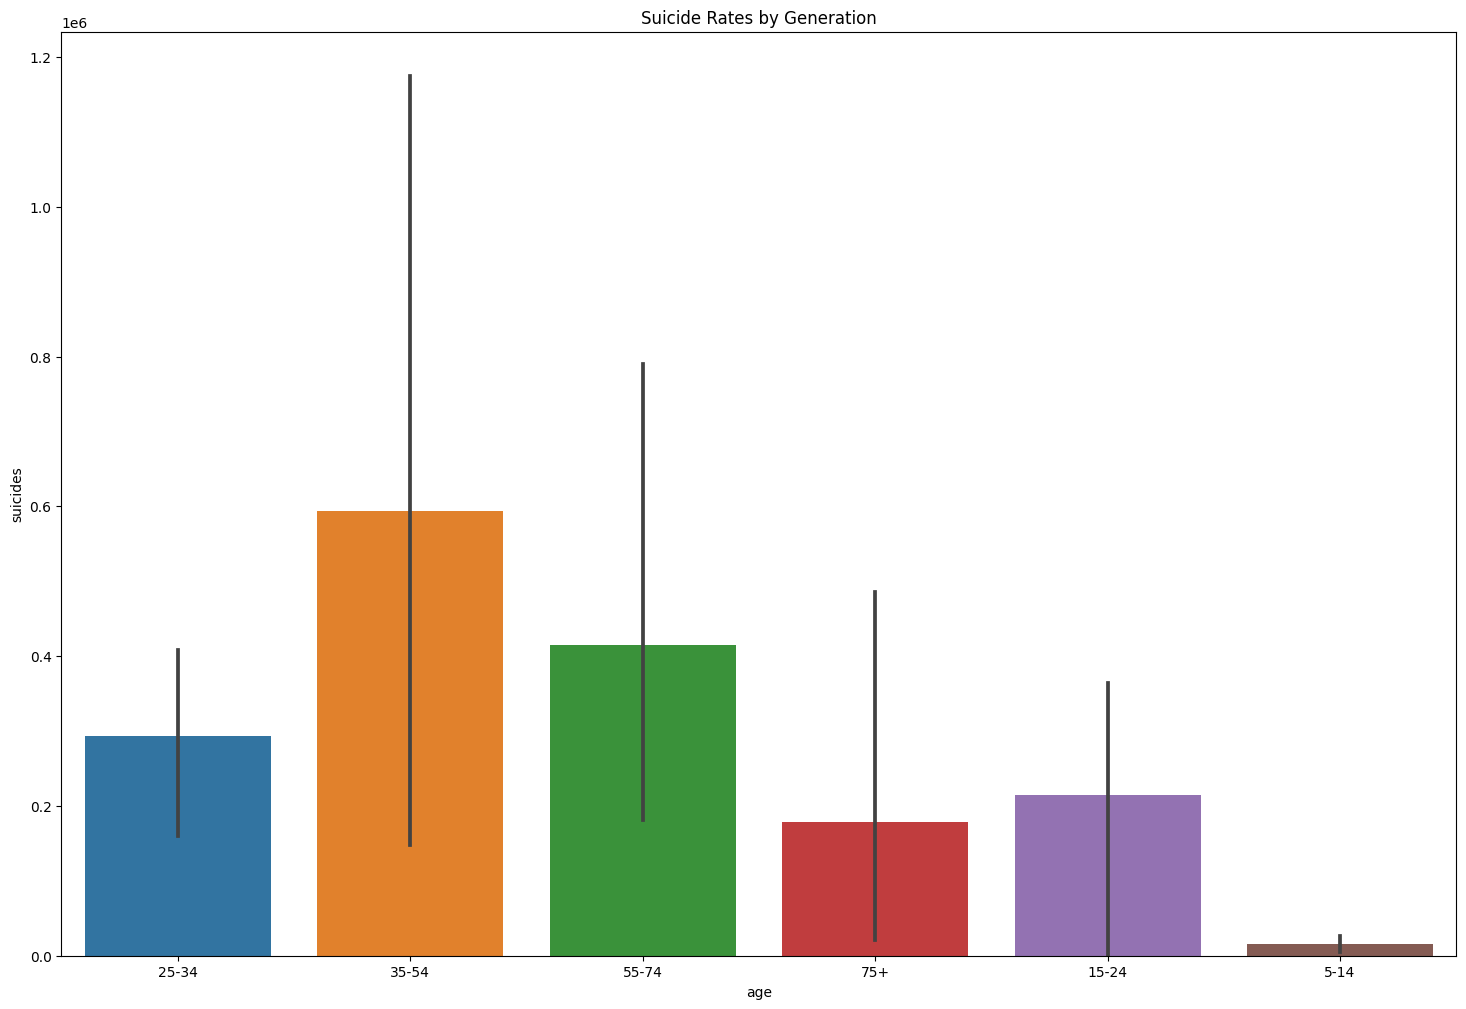

In [728]:
# plot 1
fig, ax = plt.subplots(figsize=(18,12))
# Create the scatter plot
sns.barplot(data=gen_suicides_df,   x=gen_suicides_df['age(years)'] ,y=gen_suicides_df['suicides_no'])
plt.xlabel('age')
plt.ylabel('suicides')
# Add a title
plt.title('Suicide Rates by Generation')
plt.show()

Delete code

In [484]:
del total_suicides_df['year']

Question Two: Car Sales on AA 

In [586]:
# create empty lists to store the data
title = []
sub_title = []
mileage = []
#year = []

# loop through each page
for page in range(1, 23):
    # construct the url for the page
    url = "https://www.cazoo.co.uk/cars/?maxManufacturedYear=2023&minManufacturedYear=2014&sort=price-desc&chosenPriceType=total&page={}".format(page)

    # make a request to the page and get the content
    response = requests.get(url)
    content = response.content

    # create a soup object
    soup = BeautifulSoup(content, "html.parser")

    # extract data from the page and append to the lists
    for item in soup.find_all("div", {"class": "vehicle-cardstyles__Card-sc-1bxv5iu-0 lkFzWj"}):
        title.append(item.find('p', {'class':'vehicle-cardstyles__CustomTitle-sc-1bxv5iu-6 gefmOJ'}).text.strip())
        sub_title.append(item.find('p', {'class':'vehicle-cardstyles__DisplayVariant-sc-1bxv5iu-7 lnUkth'}).text.strip())
        mileage.append(item.find('span', {'class': 'sc-1qzxxja-0 sc-17oqk9n-0 cMysQa etVBLA vehicle-cardstyles__StyledTag-sc-1bxv5iu-11 cYHbYM'}).text.strip())
        #year.append(item.find('span', {'class': "sc-1qzxxja-0 sc-17oqk9n-0 cMysQa etVBLA vehicle-cardstyles__StyledTag-sc-1bxv5iu-11 cYHbYM"}).text.strip())



# create a dictionary with the data
carsDict = {"Car Title": title, "Sub title": sub_title, "Mileage": mileage} 

# create an index
index = range(1, len(title)+1)

# create a dataframe
carsData = pd.DataFrame(carsDict, index=index)

# save the data into a csv file
carsData.to_csv("CarsDataset.csv")

In [673]:
car_data_df = pd.read_csv('CarsDataset.csv')

Identify any problemswith the data and clean accordingly.

In [690]:
car_data_df =car_data_df.dropna()

In [675]:
car_data_df = car_data_df.rename(columns={"Mileage": "Mileage(miles)"})

In [676]:
car_data_df['Mileage(miles)'] = car_data_df['Mileage(miles)'].str.replace(' miles', '')

In [677]:
car_data_df['Mileage(miles)'] = car_data_df['Mileage(miles)'].str.replace(',', '')

In [692]:
car_data_df['Mileage(miles)'] = pd.to_numeric(car_data_df['Mileage(miles)']).astype(int)

In [697]:
car_data_df = car_data_df.rename(columns={"Price": "Price(Pounds)"})
car_data_df['Price(Pounds)'] = pd.to_numeric(car_data_df['Price(Pounds)']).astype(int)

In [694]:
car_data_df['Year'] = pd.to_numeric(car_data_df['Year']).astype(int)

In [695]:
car_data_df['Number of reviews'] = pd.to_numeric(car_data_df['Number of reviews']).astype(int)
car_data_df['Ratings'] = pd.to_numeric(car_data_df['Ratings']).astype(int)

In [698]:
car_data_df.dtypes

Car Title            object
Sub title            object
Location             object
Price(Pounds)         int32
Mileage(miles)        int32
Year                  int32
Feul Type            object
Body Type            object
Transmission         object
Number of reviews     int32
Ratings               int32
dtype: object

Calculate the total car sales based on the “year” feature 

In [699]:
total_sales_df = pd.DataFrame(car_data_df.groupby(['Year'])['Price(Pounds)'].sum()).reset_index()
total_sales_df

,Year,Price(Pounds)
0,1988,20000
1,1991,6000
2,1993,130000
3,1995,150000
4,1997,35000
5,1998,85000
6,1999,15000
7,2000,125000
8,2001,80000
9,2002,62000


In [653]:
del total_sales_df['Transmission']

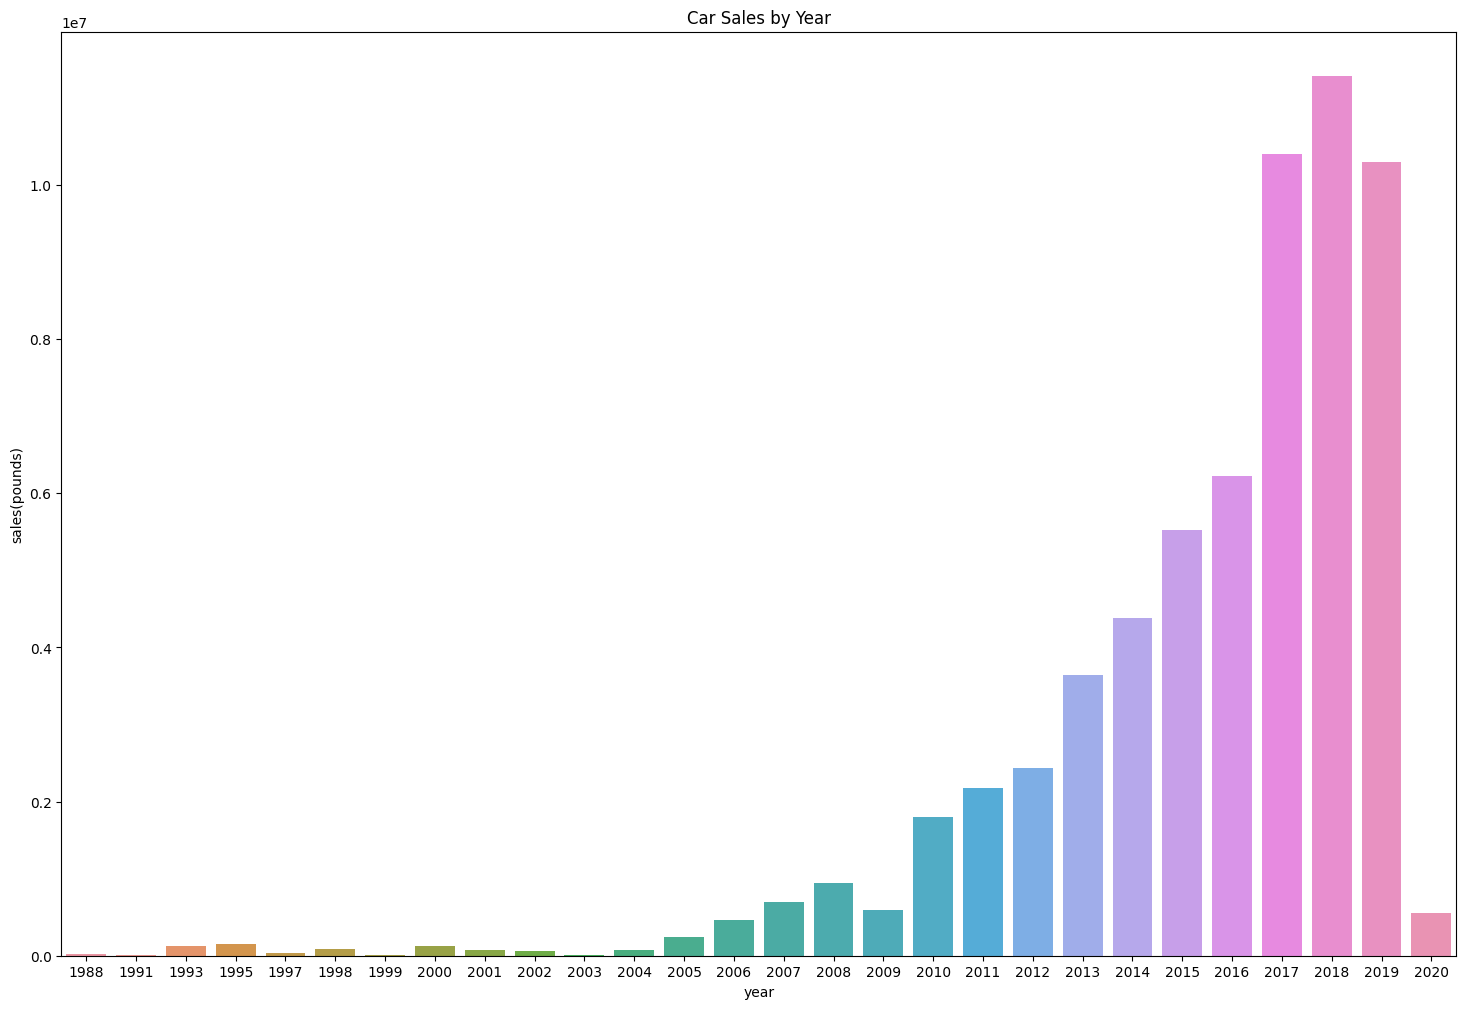

In [700]:
# plot 1
fig, ax = plt.subplots(figsize=(18,12))
# Create the scatter plot
sns.barplot(x=total_sales_df['Year'] ,y=total_sales_df['Price(Pounds)'])
plt.xlabel('year')
plt.ylabel('sales'+ '(pounds)')
# Add a title
plt.title('Car Sales by Year')
plt.show()

In [ ]:
# plot 1
fig, ax = plt.subplots(figsize=(18,12))
# Create the scatter plot
sns.barplot(x=total_sales_df['Year'] ,y=total_sales_df['Price(Pounds)'])
plt.xlabel('year')
plt.ylabel('sales'+ '(pounds)')
# Add a title
plt.title('Car Sales by Year')
plt.show()

Compare car sales on their transmission features

In [702]:
trans_sales_df = pd.DataFrame(car_data_df.groupby(['Transmission'])['Price(Pounds)'].sum()).reset_index()
trans_sales_df

,Transmission,Price(Pounds)
0,Automatic,8826500
1,Manual,12123200
2,Semi-Automatic,41634379


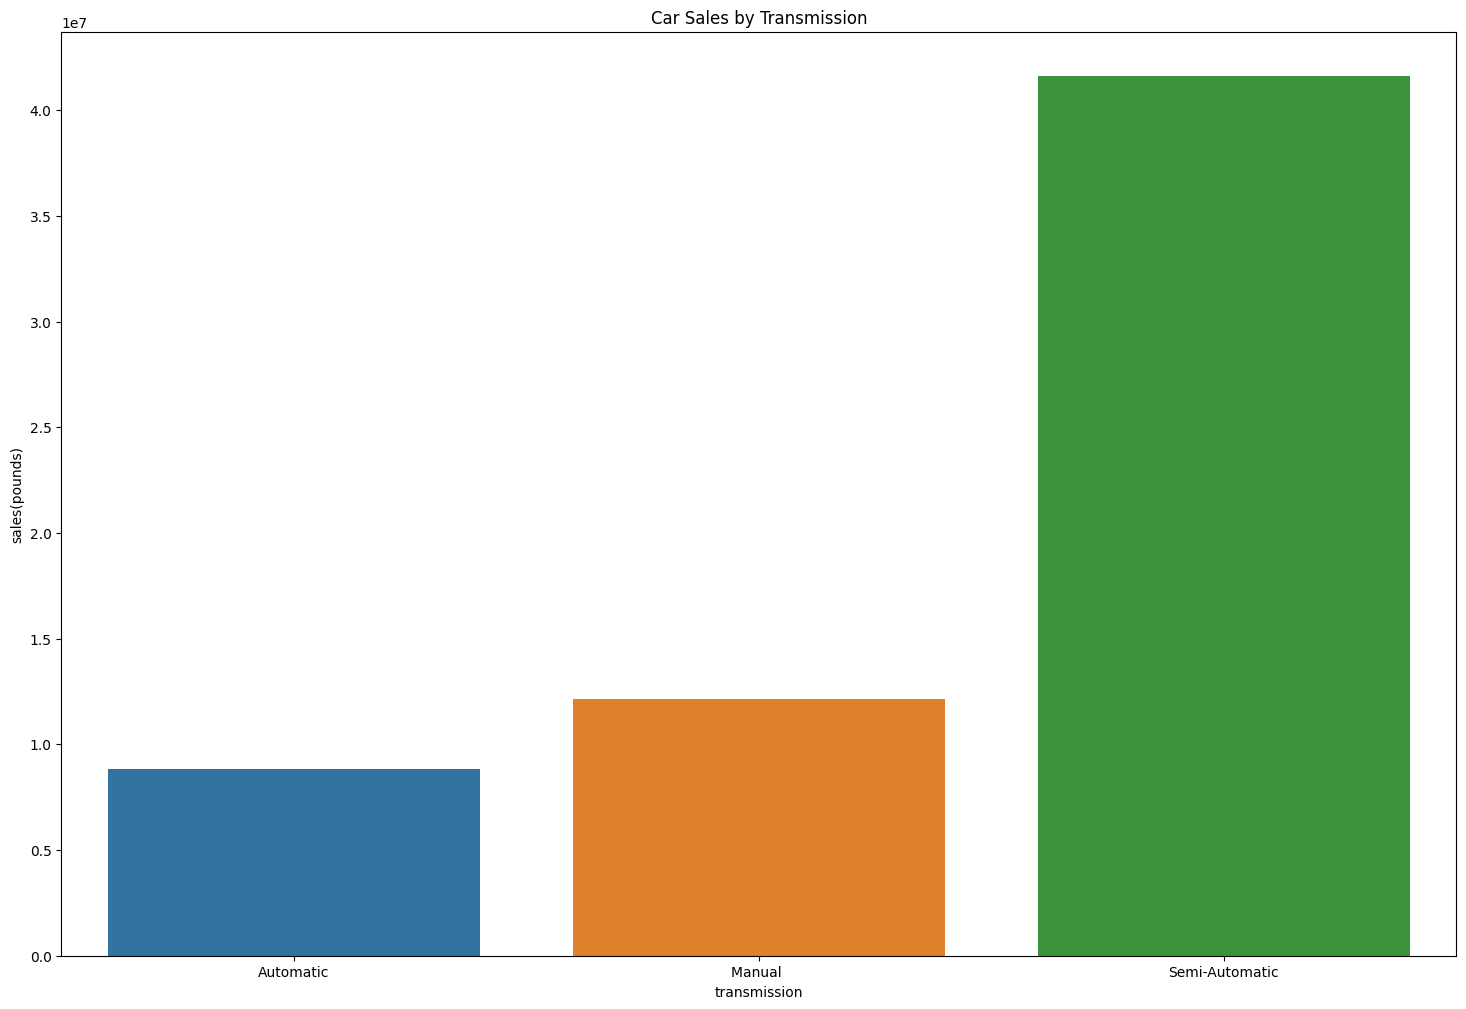

In [703]:
# plot 1
fig, ax = plt.subplots(figsize=(18,12))
# Create the scatter plot
sns.barplot(x=trans_sales_df['Transmission'] ,y=trans_sales_df['Price(Pounds)'])
plt.xlabel('transmission')
plt.ylabel('sales'+ '(pounds)')
# Add a title
plt.title('Car Sales by Transmission')
plt.show()

What are the most popular car sales based on the “Body Type”?

In [706]:
body_sales_df = pd.DataFrame(car_data_df.groupby(['Body Type'])['Price(Pounds)'].sum()).reset_index()
body_sales_df

,Body Type,Price(Pounds)
0,Convertible,4124609
1,Coupe,5694299
2,Estate,10113500
3,Hatchback,9069500
4,SUV,12275099
5,Saloon,21307072


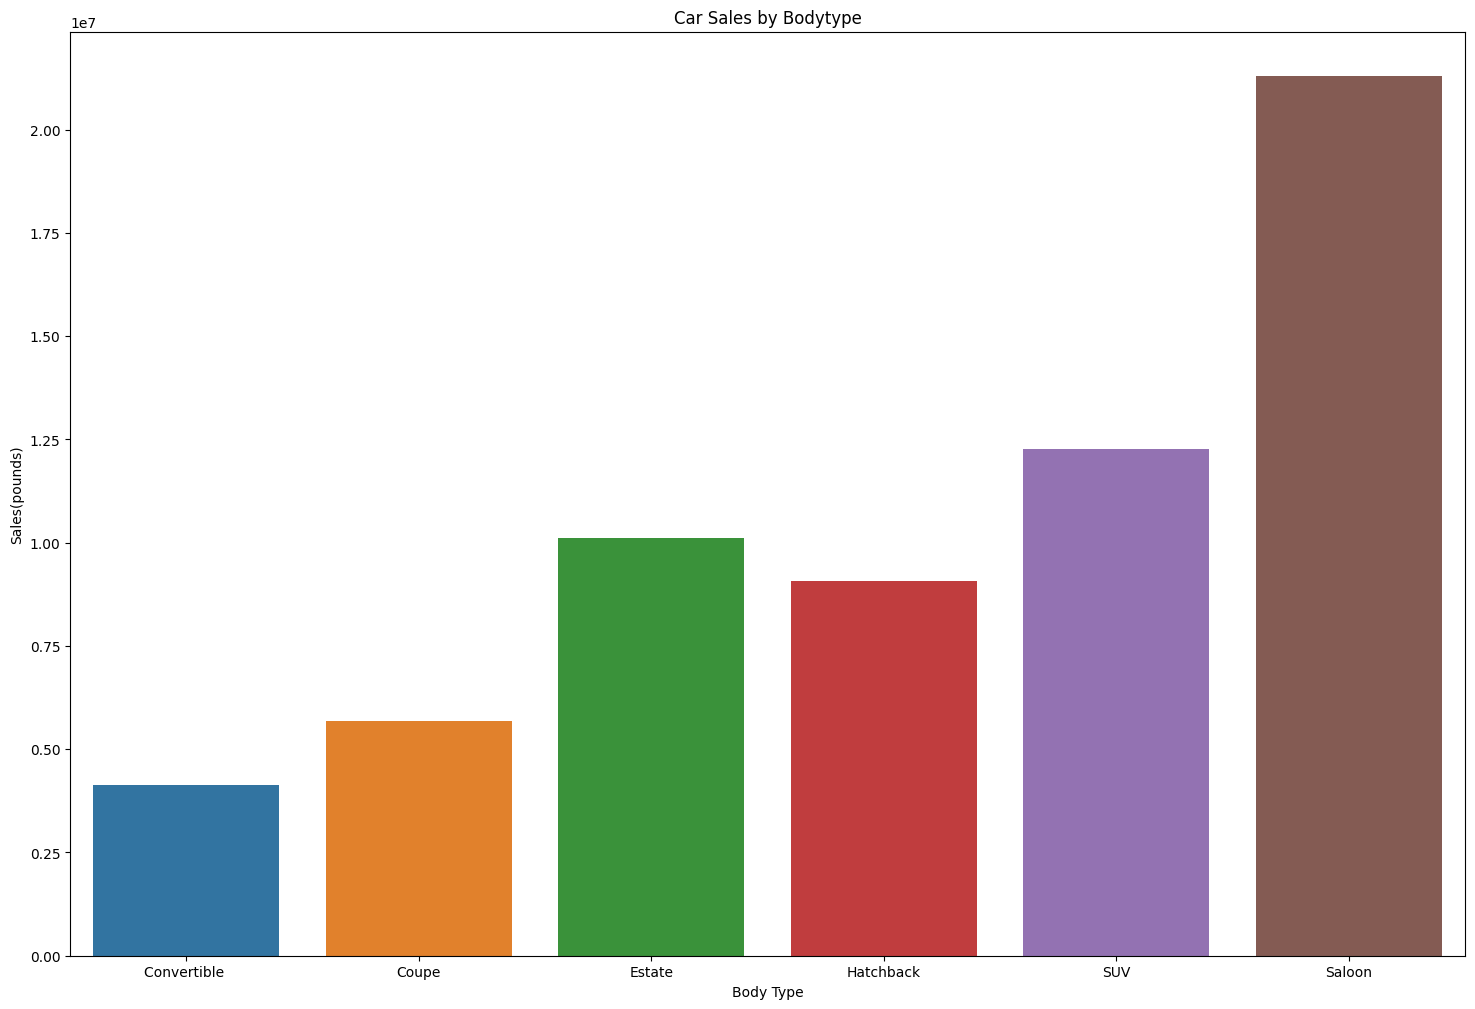

In [711]:
# plot 1
fig, ax = plt.subplots(figsize=(18,12))
# Create the scatter plot
sns.barplot(x=body_sales_df['Body Type'] ,y=body_sales_df['Price(Pounds)'])
plt.xlabel('Body Type')
plt.ylabel('Sales'+ '(pounds)')
# Add a title
plt.title('Car Sales by Bodytype')
plt.show()

List top 10 cars having highest numbers of reviews

In [709]:
reviews_df = pd.DataFrame(car_data_df.groupby(['Car Title'])['Number of reviews'].sum()).reset_index()
reviews_df

,Car Title,Number of reviews
0,Alfa Romeo Stelvio,331
1,Audi A3,201
2,Audi A3 Cabriolet,0
3,Audi A4,68
4,Audi A4 Avant,217
...,...,...
149,Volvo V90,38
150,Volvo V90 Cross Country,7
151,Volvo XC40,480
152,Volvo XC60,371


In [718]:
sorted_reviews_df = reviews_df.sort_values(by='Number of reviews', ascending=False)
top_10_df = sorted_reviews_df.head(10)
top_10_df

,Car Title,Number of reviews
69,Land Rover Range Rover Evoque,3249
68,Land Rover Discovery Sport,2637
120,Tesla Model 3,1826
87,Mercedes-Benz A Class,1176
21,BMW 1 Series,1139
89,Mercedes-Benz C Class,1134
138,Volkswagen Golf,1127
25,BMW 3 Series,1082
55,Jaguar F-PACE,1046
91,Mercedes-Benz E Class,1045


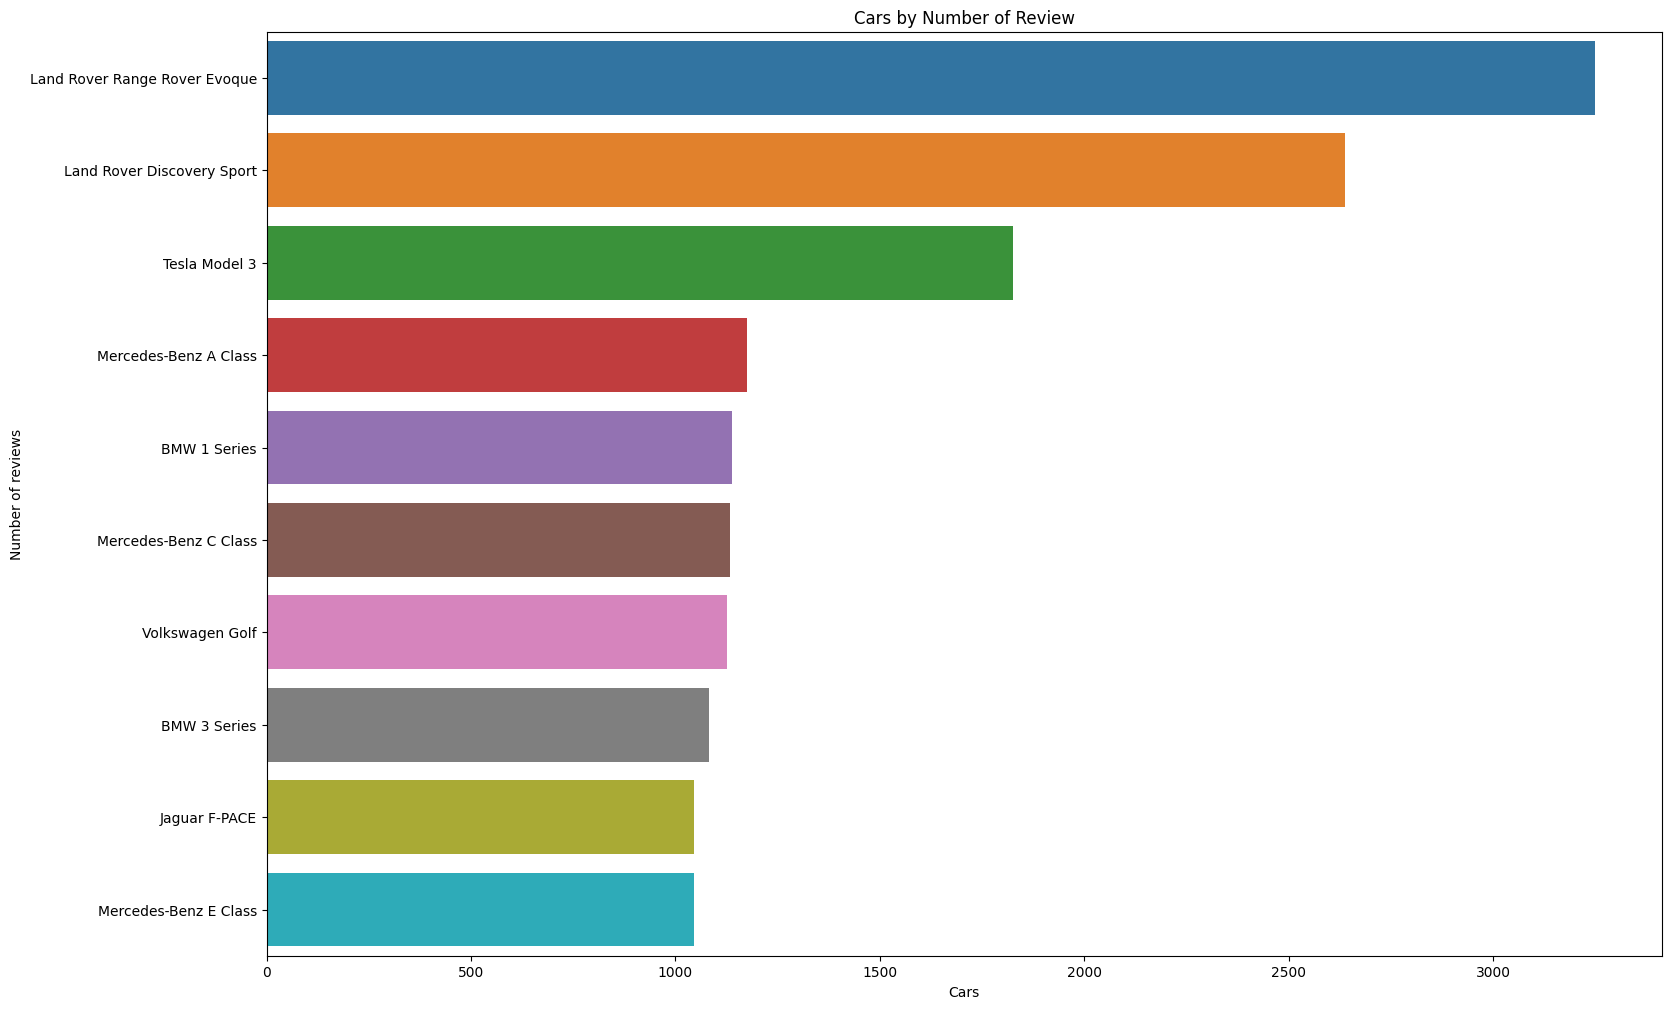

In [720]:
# plot 1
fig, ax = plt.subplots(figsize=(18,12))
# Create the scatter plot
sns.barplot(y=top_10_df['Car Title'] ,x=top_10_df['Number of reviews'])
plt.xlabel('Cars')
plt.ylabel('Number of reviews')
# Add a title
plt.title('Cars by Number of Review')
plt.show()